<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/autoProverbs/blob/main/autoProverbious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

def getSpaces(text):
    spaces = []
    for i in range(len(text)):
        if text[i] == ' ':
            spaces.append(i)
    return spaces


def getBiggestSmallest(arraio,n) :
  for index,curr  in enumerate(arraio):
    if curr > n:
      return arraio[index-1]
  return 9000

def divitedText(text, SizeLine):
  spaces = np.array(getSpaces(text))
  volta = 0
  while 1:
    #print(spaces)
    volta+=1
    local = getBiggestSmallest(spaces,SizeLine*volta)
    if local == 9000:
      break
    text = text[:local] + '\n' + text[local+1:]
  return text , volta

In [4]:
import json
import tweepy
from random import randrange
from datetime import date

today = date.today().day

with open('/content/drive/MyDrive/biblia/bibleNvi.json','r') as f:
  bible = json.load(f)
with open('/content/drive/MyDrive/keysOfNsei.json','r') as f:
  keys = (json.load(f))[0]

for book  in bible :
  if (book["abbrev"] == "pv"):
    proverbios = book
    break

cap = proverbios['chapters']

cd = cap[today-1]
limit = len(cd)
versicleIndex = randrange(0,limit)

dailyVersicle = cd[versicleIndex]
versicleAdress = f'({today}:{versicleIndex+1})'

finalResult = (f"""{dailyVersicle}
_
provérbios {versicleAdress}""")
print(finalResult)

A vara da correção dá sabedoria, mas a criança entregue a si mesma envergonha a sua mãe.
_
provérbios (29:15)


['c92a372.jpg', '7b11b76.jpg', '809b86f.jpg', '491ba8f.png', '8c1dd93.jpg', '4df0622.jpg', 'a12935b.jpg', '1574532.jpg', '62af6d8.jpg', 'ee6f239.jpg', 'ccba2ec.jpg', 'b44ef3b.jpg', 'f3de874.jpg', '389165f.png', '373c710.jpg', 'cfebce7.jpg']
19
(2160, 3152)


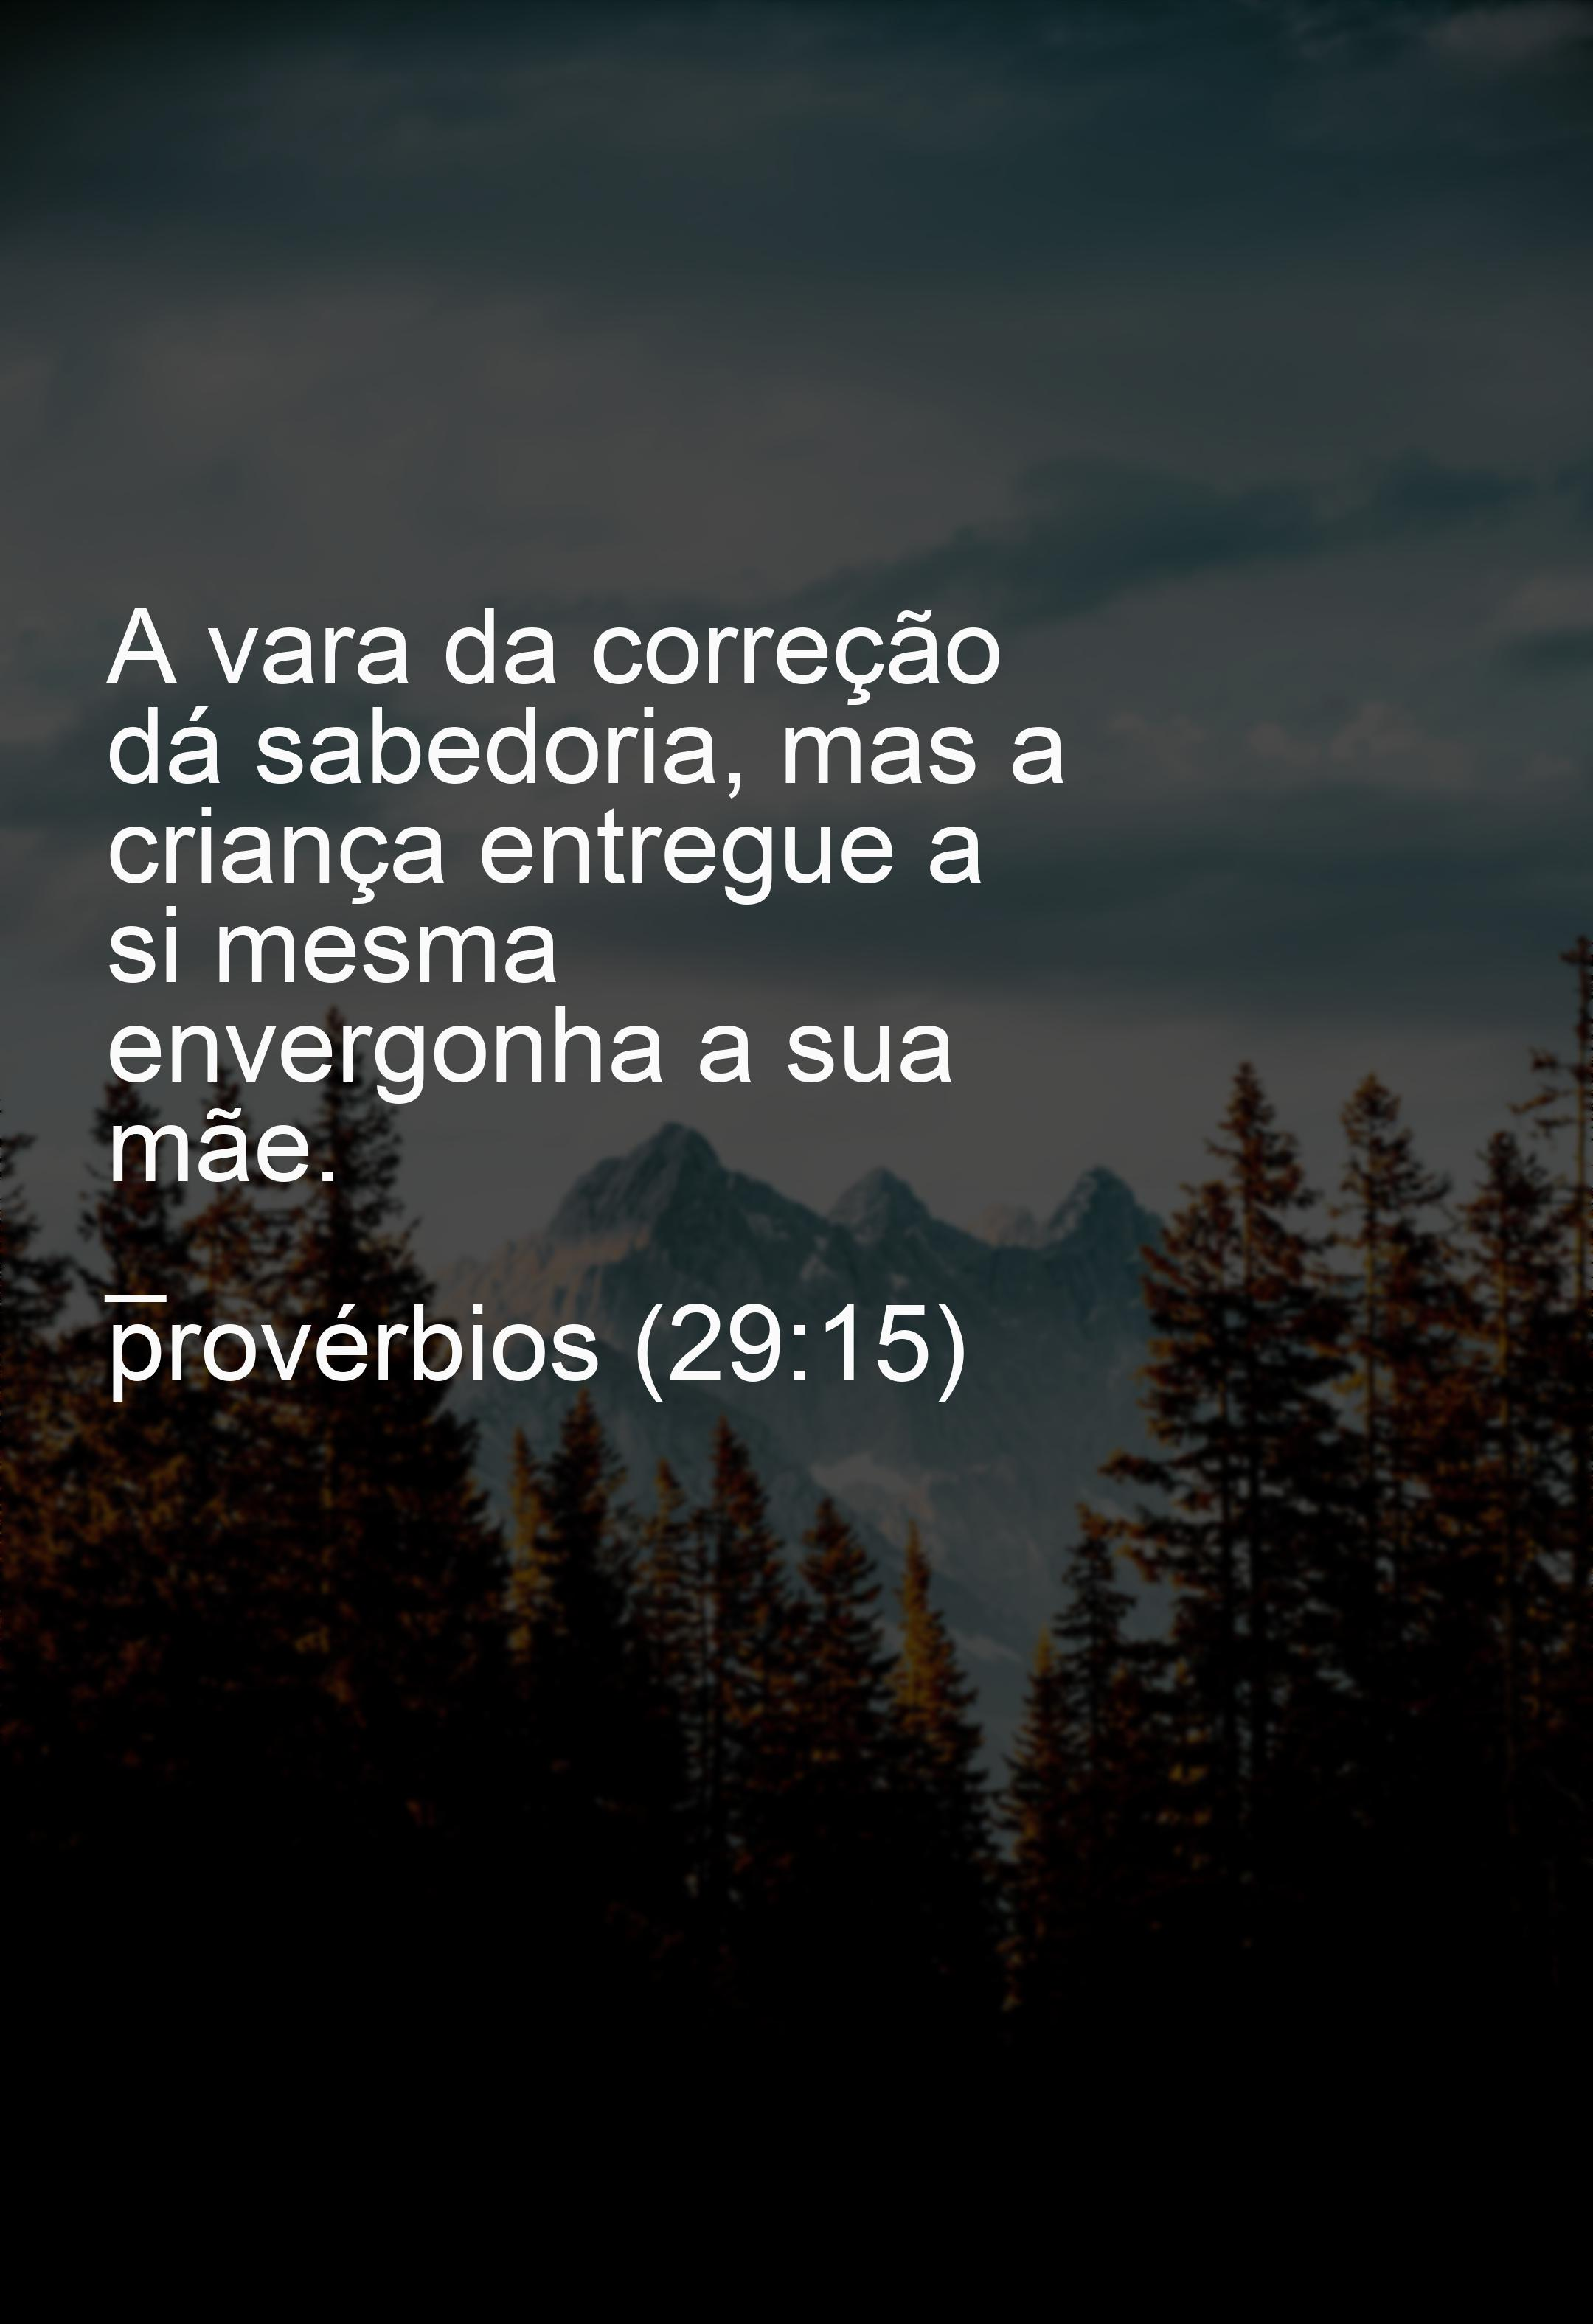

In [45]:
import numpy as np
import IPython.display as d
import os
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
import math
from random import randrange, uniform

from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)

text= finalResult
patternPath = '/content/drive/MyDrive/fotos maneras'
imgNamePath = os.listdir(patternPath)
print(imgNamePath)
imgPath = patternPath + '/' + imgNamePath[randrange(0,len(imgNamePath))]
img = Image.open(imgPath)
img = img.filter(BLUR).filter(BLUR).filter(BLUR).filter(BLUR)
img = ImageEnhance.Brightness(img).enhance(0.3)
[width, height] = img.size
cantofact = 15
sizeOfCanto = int(width/cantofact)
diminuit = 15
fontSize=int(width/diminuit)
[initialWidth,initialHeight] = map(lambda x: int(x/cantofact),[width,height])
limitLine = int(1.3*diminuit)
print(limitLine)
convertedText , numberOfLines = divitedText(text,limitLine)
print(img.size)

if (height > width):
  initialHeight =int((initialHeight/2)+(fontSize*numberOfLines*0.8))

idr = ImageDraw.Draw(img)

font = ImageFont.truetype('/content/drive/MyDrive/fontes/arial.ttf' ,int(fontSize))

idr.text((initialWidth, initialHeight), convertedText, fill=(250, 250, 250), font=font)


newPath = '/content/drive/MyDrive/guardar ultima img/last.jpg'

img.save(newPath)
d.Image(newPath)

In [ ]:
auth = tweepy.OAuthHandler(keys['chave1'],keys['chave2'])
auth.set_access_token(keys['chave3'],keys['chave4'])
api = tweepy.API(auth)

api.update_with_media(newPath,'teste c a api 1')